In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
data = yf.download("NVDA")
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-22,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.041556,0.042033,0.037615,0.040600,510480000
1999-01-26,0.038331,0.042869,0.037734,0.042033,343200000
1999-01-27,0.038212,0.039406,0.036301,0.038451,244368000
1999-01-28,0.038092,0.038451,0.037854,0.038212,227520000
...,...,...,...,...,...
2025-01-03,144.470001,144.899994,139.729996,140.009995,229322500
2025-01-06,149.429993,152.160004,147.820007,148.589996,265377400


In [45]:
# moving averages
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

data = data.dropna()

X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# fitting, testing
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.4416164466613837
R² Score: 0.9990869374001999


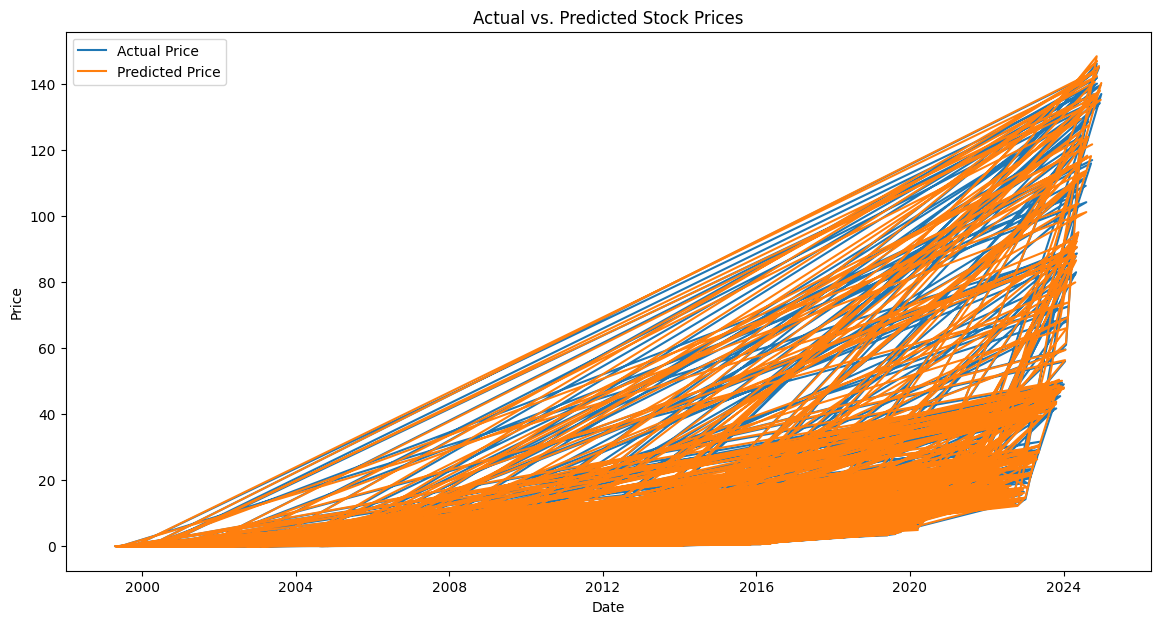

In [48]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

In [52]:
# super aggressive investment strat
start_bal = 100
curr_bal = start_bal
position = 0  

for i in range(len(X_test)):
    current_price = X_test.iloc[i]['Close'].values[0]
    predicted_price = predictions[i][0]
    
    if predicted_price > current_price and curr_bal >= current_price:
        shares_to_buy = curr_bal / current_price
        if shares_to_buy > 0:  
            position += shares_to_buy
            curr_bal -= shares_to_buy * current_price
            print(f"Buying {shares_to_buy} shares at {current_price:.2f}")

    elif predicted_price < current_price and position > 0:
        curr_bal += position * current_price
        print(f"Selling {position} shares at {current_price:.2f}")
        position = 0

print("")

final_bal = curr_bal + (position * X_test.iloc[-1]['Close'].values[0])
profit = final_bal - start_bal
print(f"Final balance: ${final_bal:.2f}")
print(f"Profit: ${profit:.2f}")

Buying 294.7381476674096 shares at 0.34
Selling 294.7381476674096 shares at 15.73
Buying 10480.526625904802 shares at 0.44
Selling 10480.526625904802 shares at 129.59
Buying 4360051.326088053 shares at 0.31
Selling 4360051.326088053 shares at 2.27
Buying 41738218.91513084 shares at 0.24
Selling 41738218.91513084 shares at 22.16
Buying 2499714994.6375833 shares at 0.37
Selling 2499714994.6375833 shares at 8.94
Buying 134315686295.84453 shares at 0.17
Selling 134315686295.84453 shares at 29.75
Buying 1542412503579.792 shares at 2.59
Selling 1542412503579.792 shares at 39.75
Buying 306536808096373.1 shares at 0.20
Selling 306536808096373.1 shares at 21.69
Buying 485466975171564.06 shares at 13.70
Selling 485466975171564.06 shares at 85.94
Buying 950793827237601.0 shares at 43.88
Selling 950793827237601.0 shares at 39.15
Buying 1.1730678923731808e+17 shares at 0.32
Selling 1.1730678923731808e+17 shares at 30.60
Buying 1.286933211824335e+19 shares at 0.28
Selling 1.286933211824335e+19 share

[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 2.2920678967144665
R² Score: 0.9997579292153048


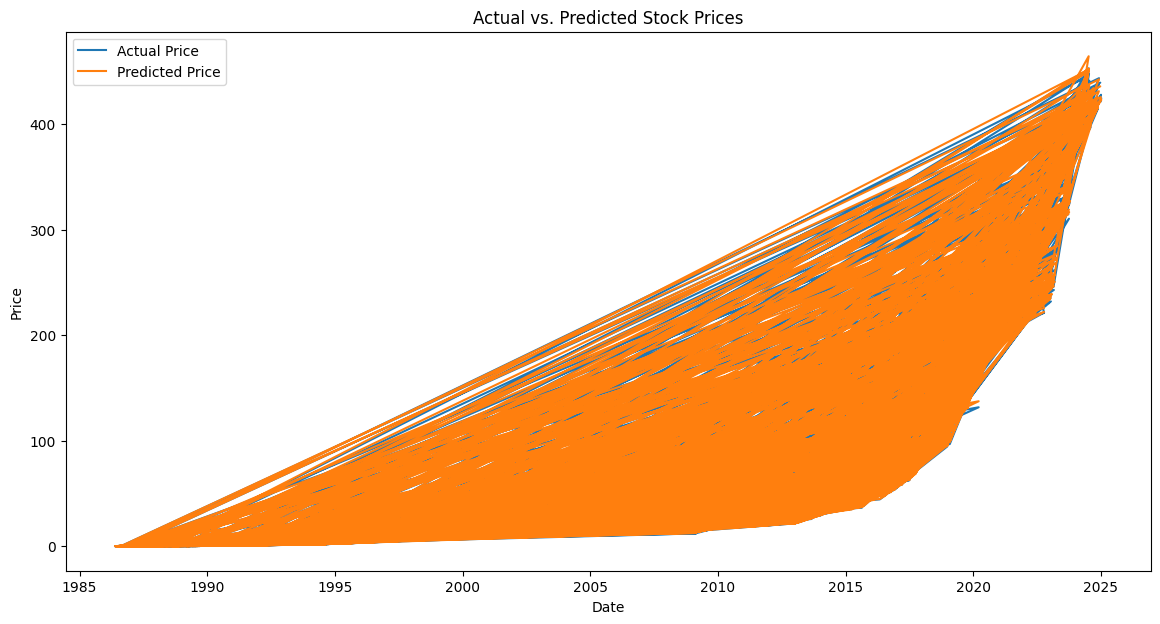

In [53]:
data = yf.download("MSFT")
data

# moving averages
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

data = data.dropna()

X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting, testing
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()